In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import data directly from myria

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-div_phyto_TS/data?format=csv'
result = pd.read_csv(fileURL)
print(result.columns)

Index([u'N0', u'H', u'J', u'T', u'S', u'LON', u'LAT', u'Cruise'], dtype='object')


In [7]:
# plot the mean bead fsc_small value in space
# the data

# pick which variable to plot

value = 'J'
x = (result['LON']).values # longitude
y = (result['LAT']).values # latitude
z = (result[value]).values # bead attribute

# convert all longitude to longitude east
x[x<0]= 360+x[x<0];

xew = x
xew[xew>180] = xew[xew>180]-360

print(max(x))

179.992


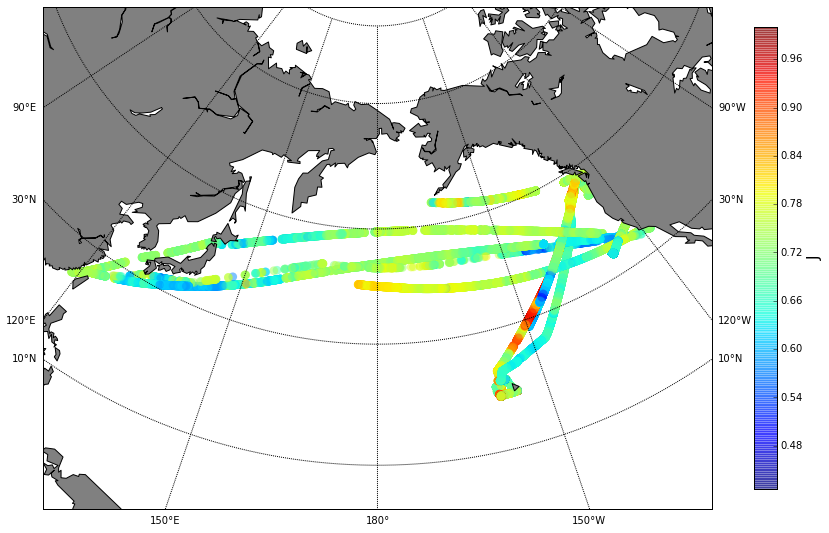

In [8]:
fig1 = plt.figure(1, figsize=(15,9))

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=15.,lat_2=60,lat_0=45,lon_0=-180.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(xew,y)
m.scatter(xm, ym, s=75, c=z, alpha=.5,lw=0)

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.92)
cb.set_label(label=value,fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

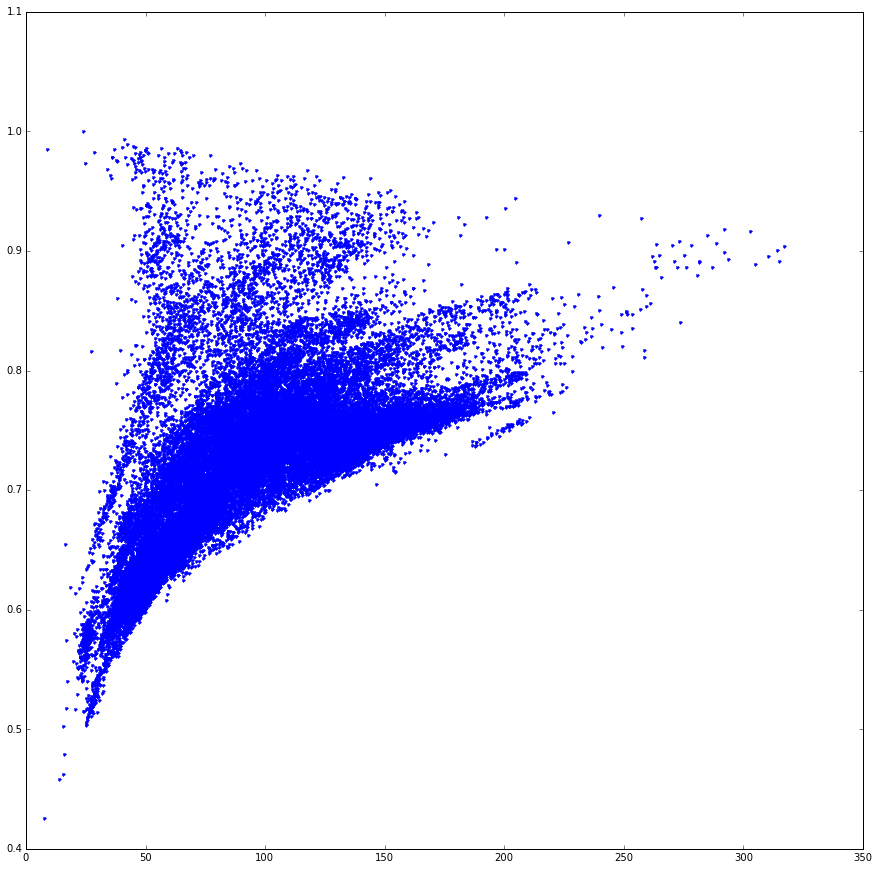

In [6]:
fig2 = plt.figure(2, figsize=(15,15))

plt.plot(np.exp(result['H'].values),result['J'],'.')